# Timeseries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_rows = 6
pd.options.display.max_columns = 8
pd.options.display.width = 80

/Users/jreback/miniconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Frequency

http://pandas.pydata.org/pandas-docs/stable/timeseries.html#dateoffset-objects

In [2]:
i = pd.date_range('20130101 09:00:00',periods=5)
i

DatetimeIndex(['2013-01-01 09:00:00', '2013-01-02 09:00:00',
               '2013-01-03 09:00:00', '2013-01-04 09:00:00',
               '2013-01-05 09:00:00'],
              dtype='datetime64[ns]', freq='D')

In [3]:
i + pd.offsets.Hour(1)

DatetimeIndex(['2013-01-01 10:00:00', '2013-01-02 10:00:00',
               '2013-01-03 10:00:00', '2013-01-04 10:00:00',
               '2013-01-05 10:00:00'],
              dtype='datetime64[ns]', freq='D')

In [4]:
i = pd.date_range('20130101 09:00:00',periods=5,freq='MS')
i

DatetimeIndex(['2013-01-01 09:00:00', '2013-02-01 09:00:00',
               '2013-03-01 09:00:00', '2013-04-01 09:00:00',
               '2013-05-01 09:00:00'],
              dtype='datetime64[ns]', freq='MS')

In [5]:
i + pd.offsets.MonthEnd()

DatetimeIndex(['2013-01-31 09:00:00', '2013-02-28 09:00:00',
               '2013-03-31 09:00:00', '2013-04-30 09:00:00',
               '2013-05-31 09:00:00'],
              dtype='datetime64[ns]', freq='M')

In [6]:
date_range(i[0], periods=10, freq='1D10U')

DatetimeIndex([       '2013-01-01 09:00:00', '2013-01-02 09:00:00.000010',
               '2013-01-03 09:00:00.000020', '2013-01-04 09:00:00.000030',
               '2013-01-05 09:00:00.000040', '2013-01-06 09:00:00.000050',
               '2013-01-07 09:00:00.000060', '2013-01-08 09:00:00.000070',
               '2013-01-09 09:00:00.000080', '2013-01-10 09:00:00.000090'],
              dtype='datetime64[ns]', freq='86400000010U')

# Timezones

http://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-zone-handling

In [7]:
s = Series(pd.date_range('20130101 09:00:00',periods=5,tz='US/Eastern'))
s

0   2013-01-01 09:00:00-05:00
1   2013-01-02 09:00:00-05:00
2   2013-01-03 09:00:00-05:00
3   2013-01-04 09:00:00-05:00
4   2013-01-05 09:00:00-05:00
dtype: datetime64[ns, US/Eastern]

In [8]:
s.dt.tz_convert('UTC')

0   2013-01-01 14:00:00+00:00
1   2013-01-02 14:00:00+00:00
2   2013-01-03 14:00:00+00:00
3   2013-01-04 14:00:00+00:00
4   2013-01-05 14:00:00+00:00
dtype: datetime64[ns, UTC]

In [9]:
s.astype('datetime64[ns]')

0   2013-01-01 14:00:00
1   2013-01-02 14:00:00
2   2013-01-03 14:00:00
3   2013-01-04 14:00:00
4   2013-01-05 14:00:00
dtype: datetime64[ns]

# Timedeltas

http://pandas.pydata.org/pandas-docs/stable/timedeltas.html

In [10]:
s = Series(pd.timedelta_range('1 day',periods=5,freq='2 s'))
s

0   1 days 00:00:00
1   1 days 00:00:02
2   1 days 00:00:04
3   1 days 00:00:06
4   1 days 00:00:08
dtype: timedelta64[ns]

In [11]:
s[0]

Timedelta('1 days 00:00:00')

In [12]:
# create from a date_range
dr = pd.date_range('20130101 09:00:00',periods=5,freq='MS')
dr-dr[0]

TimedeltaIndex(['0 days', '31 days', '59 days', '90 days', '120 days'], dtype='timedelta64[ns]', freq=None)

In [13]:
r = s + (dr-dr[0])
r

0     1 days 00:00:00
1    32 days 00:00:02
2    60 days 00:00:04
3    91 days 00:00:06
4   121 days 00:00:08
dtype: timedelta64[ns]

In [14]:
r.astype('timedelta64[s]')

0       86400
1     2764802
2     5184004
3     7862406
4    10454408
dtype: float64

In [15]:
r.dt.components

,days,hours,minutes,seconds,milliseconds,microseconds,nanoseconds
0,1,0,0,0,0,0,0
1,32,0,0,2,0,0,0
2,60,0,0,4,0,0,0
3,91,0,0,6,0,0,0
4,121,0,0,8,0,0,0


# Resampling

http://pandas.pydata.org/pandas-docs/stable/timeseries.html#resampling

In [16]:
df = pd.read_hdf('data/beer.hdf')

In [17]:
review_times = df.time.value_counts().sort_index()
review_times

2009-10-05 21:31:48    1
2009-10-05 21:32:09    1
2009-10-05 21:32:13    1
                      ..
2009-12-25 17:23:52    1
2009-12-25 17:25:06    1
2009-12-25 17:26:06    1
Name: time, dtype: int64

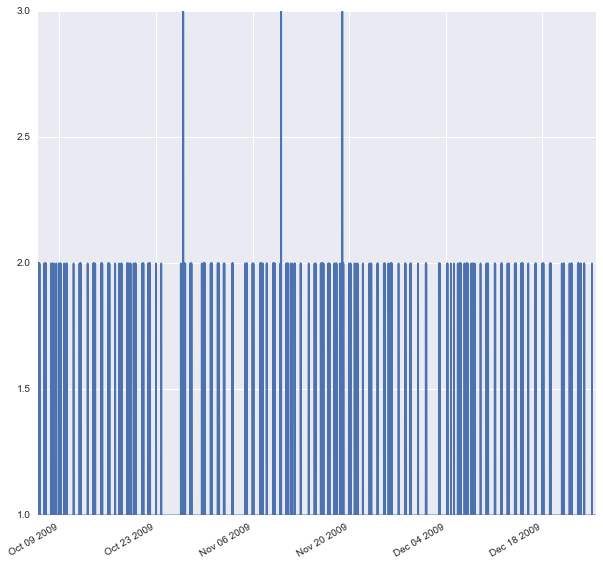

In [18]:
review_times.plot(figsize=(10,10))

Right now the frequency is way to high to be meaningful. `resample` lets you adjust the frequency.

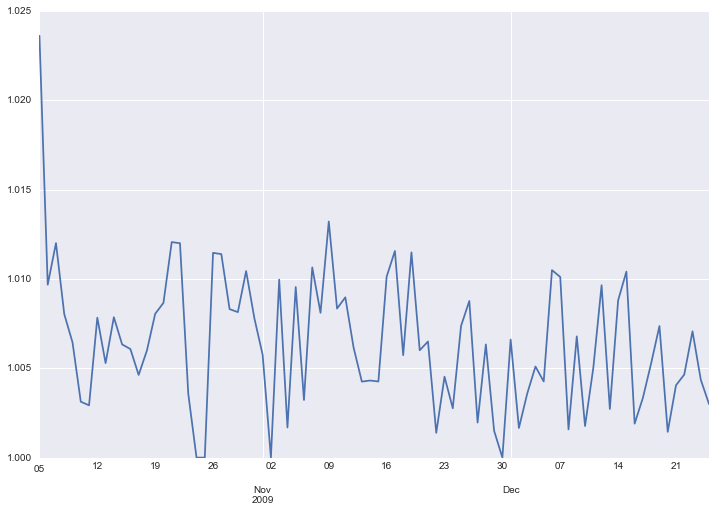

In [19]:
review_times.resample("D").plot(figsize=(12,8))

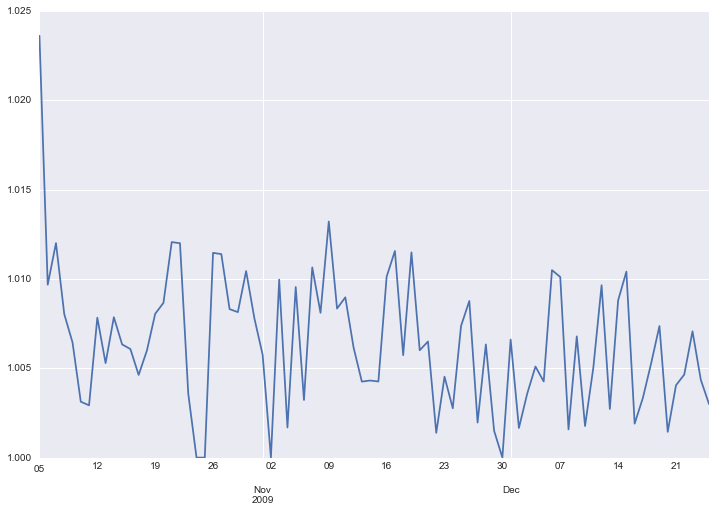

In [20]:
# resampling by grouping
(df
  .time
  .value_counts()
  .groupby(pd.Grouper(level=0,freq='D'))
  .mean()
  .plot
  .line(figsize=(12,8))
)


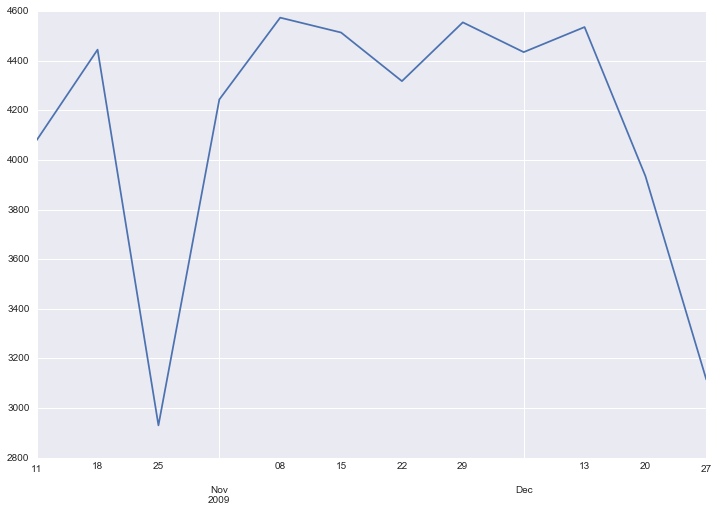

In [22]:
review_times.resample("W",how='count').plot(figsize=(12,8))

In [27]:
np.random.seed(1234)
rng = pd.date_range('20130101 09:30:00',periods=1000,freq='ms')
s = Series(np.random.randn(1000)*.1+50,rng.take(np.random.randint(0,len(rng),size=len(rng))))
s

2013-01-01 09:30:00.741    50.047144
2013-01-01 09:30:00.030    49.880902
2013-01-01 09:30:00.878    50.143271
                             ...    
2013-01-01 09:30:00.282    50.032753
2013-01-01 09:30:00.731    50.074081
2013-01-01 09:30:00.679    49.919809
dtype: float64

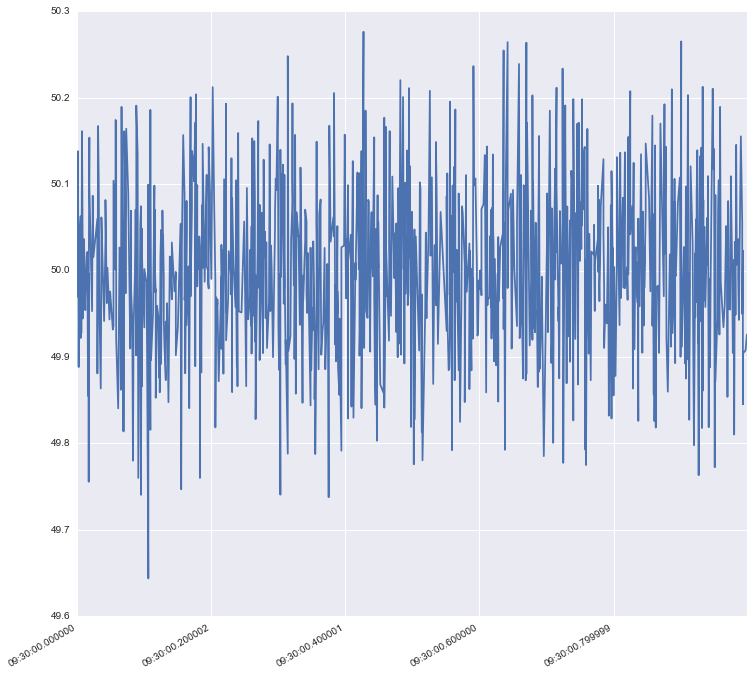

In [41]:
s.sort_index().plot(figsize=(12,12))

In [33]:
res = s.resample('1ms',how='ohlc')
res

,open,high,low,close
2013-01-01 09:30:00.000,50.050176,50.050176,50.050176,50.050176
2013-01-01 09:30:00.001,49.969851,50.138129,49.969851,50.138129
2013-01-01 09:30:00.002,49.888302,49.888302,49.888302,49.888302
...,...,...,...,...
2013-01-01 09:30:00.997,49.907617,49.907617,49.907617,49.907617
2013-01-01 09:30:00.998,NaN,NaN,NaN,NaN
2013-01-01 09:30:00.999,49.925853,49.925853,49.925853,49.925853


# Computational Tools

http://pandas.pydata.org/pandas-docs/stable/computation.html

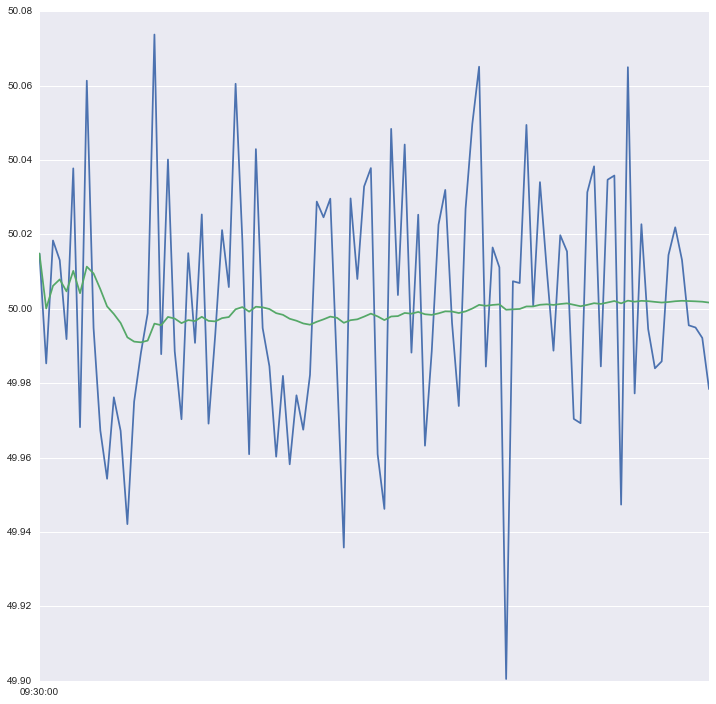

In [48]:
pd.rolling_mean(s.sort_index(),freq='10ms',window=1).plot(figsize=(12,12))
pd.expanding_mean(s.sort_index(),freq='10ms').plot(figsize=(12,12))